**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "fcc_crispri_hcrff"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.CRISPRi_HCRFF.CASA.bed.gz 
K562.hg38.CRISPRi_HCRFF.CASA.tsv 
summary 


In [4]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(dat)

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Region location
Score,CASA peak score
Strand,Defines the strand. Either '.' (=no strand) or '+' or '-'.
Gene_Symbol,Gene symbol; Gene that is screened for CRISPRi-FlowFish
Gene_Ensembl,Gene Ensembl ID; Gene that is screened for CRISPRi-FlowFish
Group,Assay Name
Label,Region Label; {Assay Name}:{Tested Gene Name}


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.CRISPRi_HCRFF.CASA.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_casa = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Group,Label
chr11,5248847,5249047,chr11:5248847-5249047,1.0686240,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5248847,5249047,chr11:5248847-5249047,0.9357701,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5249847,5250847,chr11:5249847-5250847,1.8908899,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5249847,5250847,chr11:5249847-5250847,1.9229558,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5253147,5253547,chr11:5253147-5253547,1.3303423,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5253147,5253547,chr11:5253147-5253547,1.3232571,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2


## Explore data

### Distribution of CASA scores

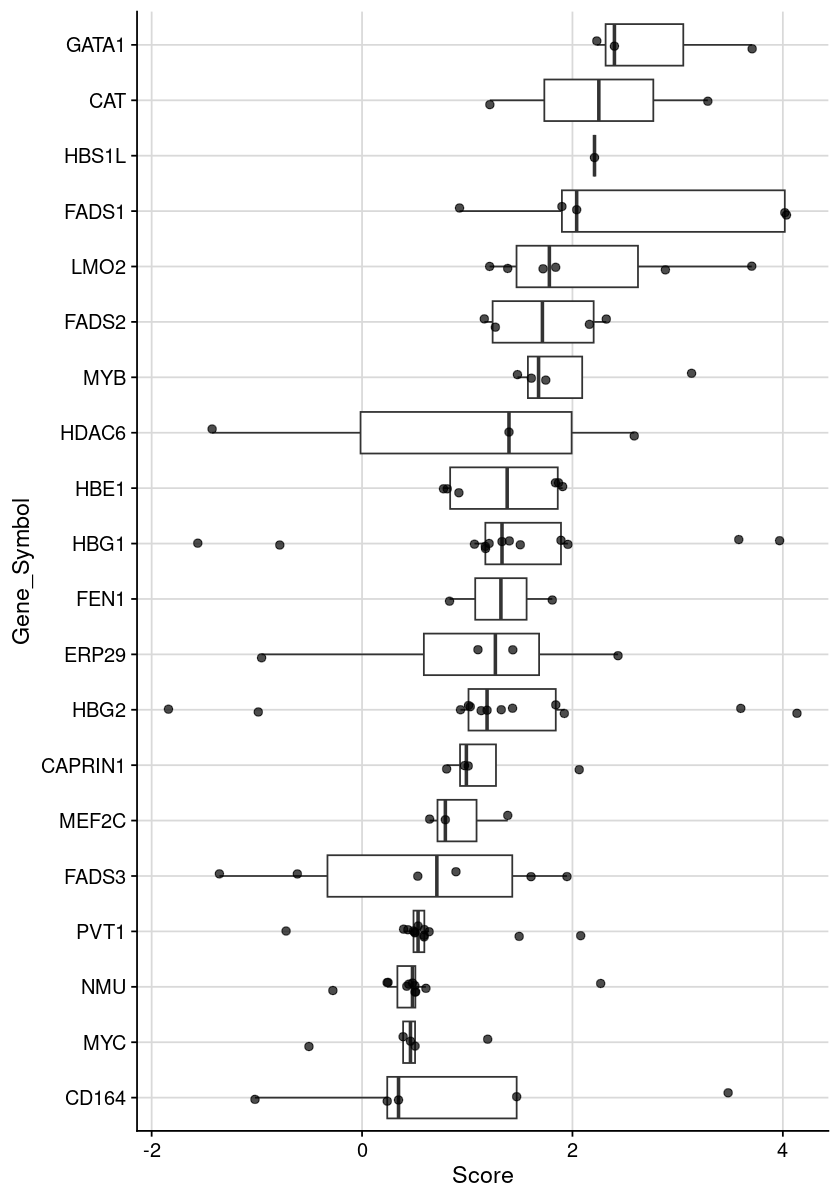

In [6]:
### init
dat = dat_region_casa

### order gene by median
tmp = dat
tmp = tmp %>%
    dplyr::group_by(Gene_Symbol) %>%
    dplyr::summarise(
        Score_Mean   = mean(Score),
        Score_Median = median(Score),
        .groups = "drop"
    ) %>%
    dplyr::arrange(Score_Median)
vec = tmp$Gene_Symbol
dat = dat %>% dplyr::mutate(Gene_Symbol = factor(Gene_Symbol, levels = vec))

### create plot
set.seed(123)
gpt = ggplot(dat, aes(x=Score, y=Gene_Symbol)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(color="black", width=0.0, height=0.1, size=2, alpha=0.7) +
    theme_cowplot() +
    background_grid()

### show plot
options(repr.plot.height=10, repr.plot.width=7)
print(gpt)

### Distribution of peak size

**Summary**

In [7]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

cat("#{Region} =", nrow(dat), "\n")
cat("\n")
cat("Length:\n")
summary(dat$Length)

#{Region} = 113 

Length:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    200     600    1000    1343    2000    6500 

**Plot histogram**

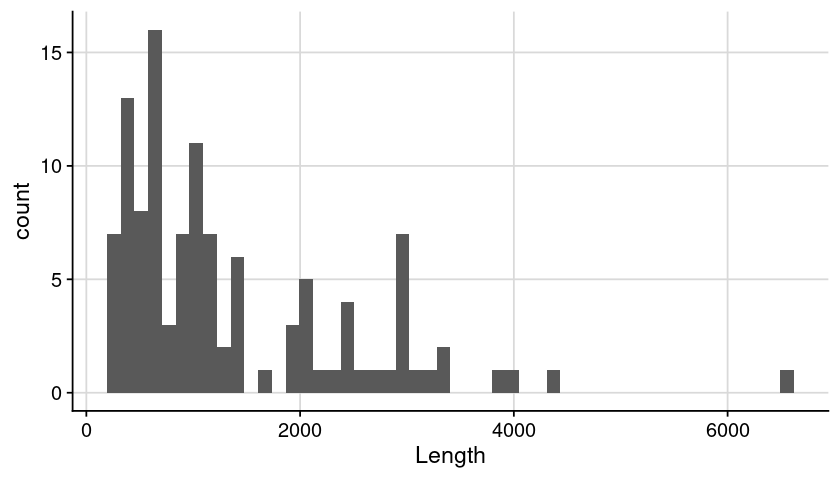

In [8]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

gpt = ggplot(dat, aes(x = Length)) + 
    geom_histogram(bins = 50) + 
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

**Plot density**

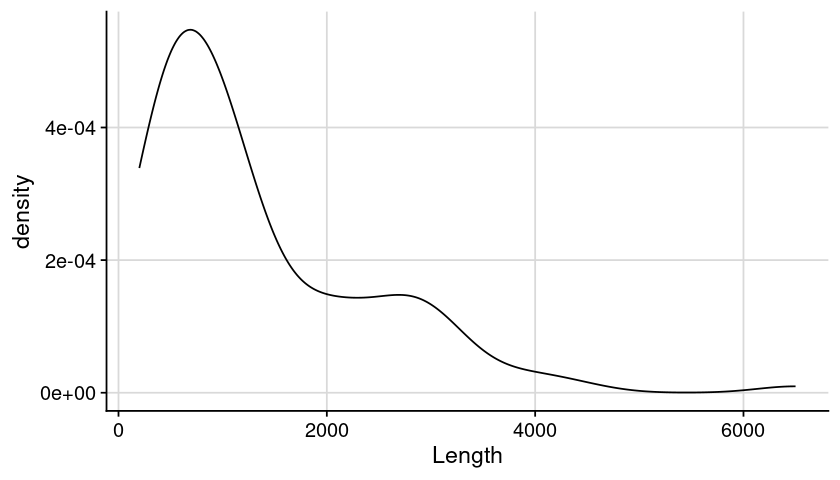

In [9]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

gpt = ggplot(dat, aes(x = Length)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

**Question: what is the one with 6kb**

In [10]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
dat %>% dplyr::filter(Length > 6000)

Chrom,ChromStart,ChromEnd,Name,Score,Strand,Gene_Symbol,Gene_Ensembl,Group,Label,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr4,55634441,55640941,chr4:55634441-55640941,2.268011,.,NMU,ENSG00000109255,CRISPRi-HCRFF,CRISPRi-HCRFF:NMU,6500


## Save figures

In [11]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 16),
    axis.text  = element_text(size = 14)
)

### Distribution of scores

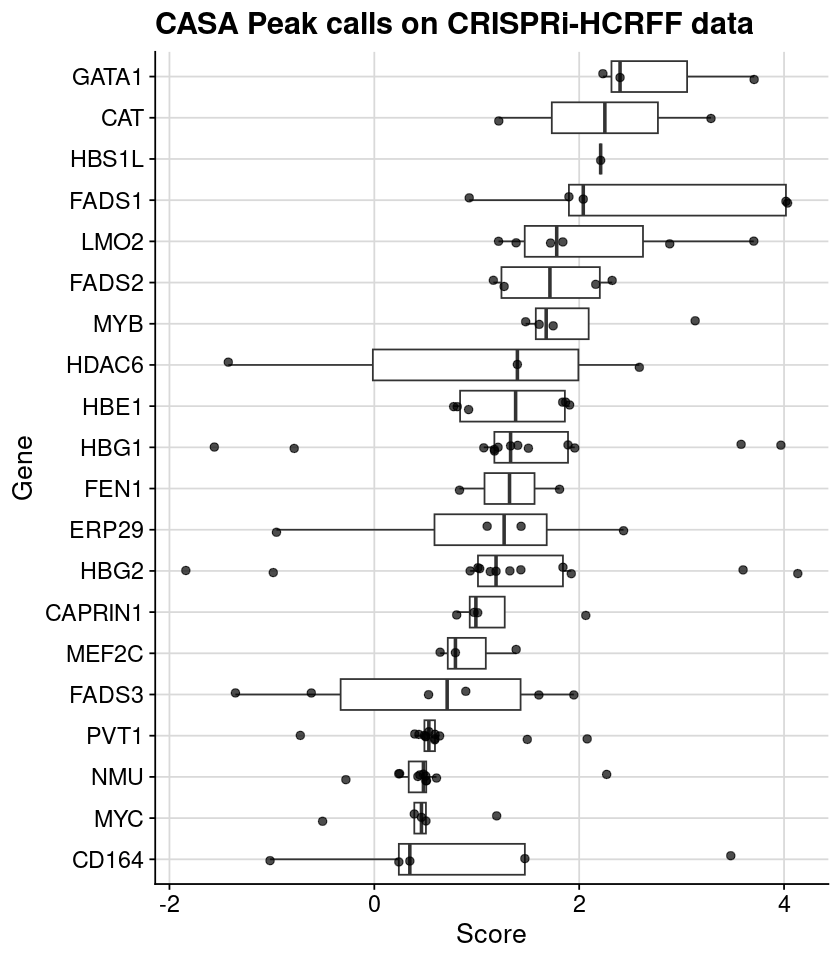

In [12]:
### init
dat = dat_region_casa

### order gene by median
tmp = dat
tmp = tmp %>%
    dplyr::group_by(Gene_Symbol) %>%
    dplyr::summarise(
        Score_Mean   = mean(Score),
        Score_Median = median(Score),
        .groups = "drop"
    ) %>%
    dplyr::arrange(Score_Median)
vec = tmp$Gene_Symbol
dat = dat %>% dplyr::mutate(Gene_Symbol = factor(Gene_Symbol, levels = vec))

### create plot
set.seed(123)
gpt = ggplot(dat, aes(x=Score, y=Gene_Symbol)) + 
    geom_boxplot(outlier.shape = NA) +
    geom_jitter(color="black", width=0.0, height=0.1, size=2, alpha=0.7) +
    theme_cowplot() +
    background_grid() +
    theme_text +
    labs(x="Score", y="Gene", title="CASA Peak calls on CRISPRi-HCRFF data")

### assign plot
gpt_export_score = gpt

### show plot
options(repr.plot.height=8, repr.plot.width=7)
print(gpt)

### Distribution of region length

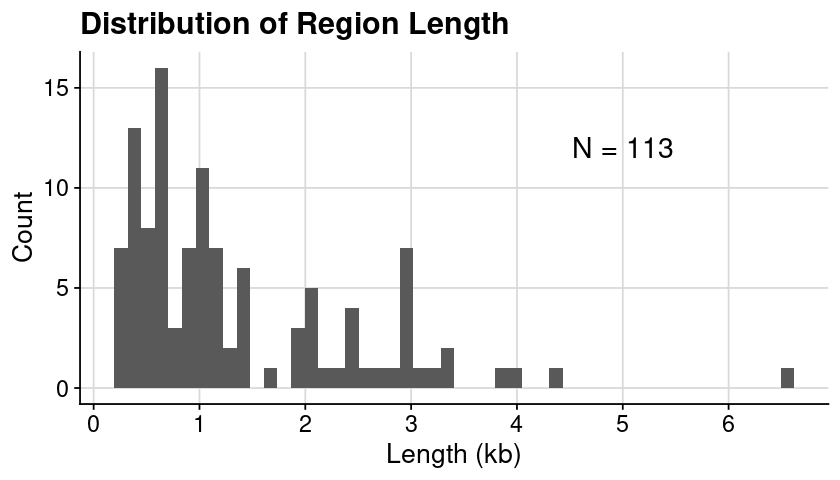

In [13]:
### calculate region length
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

### plot distribution
gpt = ggplot(dat, aes(x = Length/1000)) + 
    geom_histogram(bins = 50) + 
    theme_cowplot() + 
    background_grid() +
    theme_text +
    labs(x = "Length (kb)", y = "Count", title = "Distribution of Region Length") +
    scale_x_continuous(breaks = seq(0, 7, by = 1))

### add annotation
txt = paste("N =", scales::comma(nrow(dat)))
gpt = gpt + annotate(
    "text", 
    x = 5, 
    y = 12,
    size  = 6,
    label = txt)

### assign plot
gpt_export_length = gpt

### show plot
options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

### Save plots

In [14]:
### save plot: score distribution
plt_export = gpt_export_score

txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_hcrff.distribution.score.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 8, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_hcrff.distribution.score.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 8, width = 7, units = "in")

In [15]:
### save plot: length distribution
plt_export = gpt_export_length

txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_hcrff.distribution.region_length.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.fcc_crispri_hcrff.distribution.region_length.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 4, width = 7, units = "in")